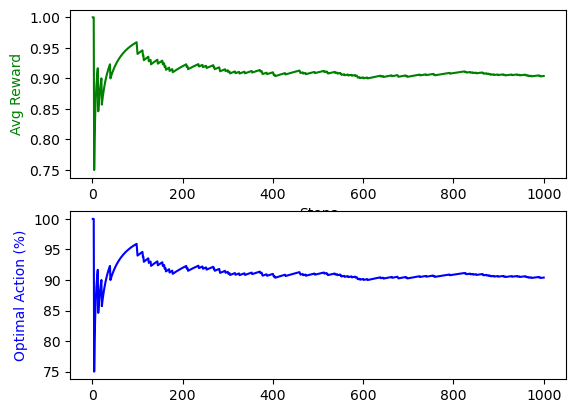

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

k = 10

def default_bandit(a: int) -> float:
    if a == 1:
        return 1.0
    else:
        return 0.0

def default_epsilon(step: int) -> float:
    return 0.1

def default_alpha(step: int, n: int) -> float:
    return 1/n

def plot(info: list[tuple[int, float, float]]) -> None:
    steps, avg_r, opt_a = zip(*info)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(steps, avg_r, 'g-')
    ax2.plot(steps, opt_a, 'b-')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Avg Reward', color='g')
    ax2.set_ylabel('Optimal Action (%)', color='b')
    plt.show()

def main(steps=1000, get_epsilon=default_epsilon, get_alpha=default_alpha, bandit=default_bandit):
    q = [0.0] * k
    n = [0] * k
    info = []
    r_total = 0
    opt_total = 0

    for step in range(1, steps+1):
        epsilon = get_epsilon(step)

        if random.random() < epsilon:
            a: int = random.randint(1, k)
        else:
            a: int = np.argmax(q) + 1

        # calculate all rewards to know the best action (after)
        rewards = [bandit(i) for i in range(1, k+1)]
        r = rewards[a-1]
        n[a-1] += 1
        alpha = get_alpha(step, n[a-1])
        q[a-1] += alpha * (r - q[a-1])

        r_total += r
        r_avg = r_total / step
        best_r = max(rewards)
        is_best_a = r == best_r
        opt_total += 1 if is_best_a else 0
        opt_percent = 100.0 * opt_total / step
        info.append((step, r_avg, opt_percent))

    plot(info)

main()

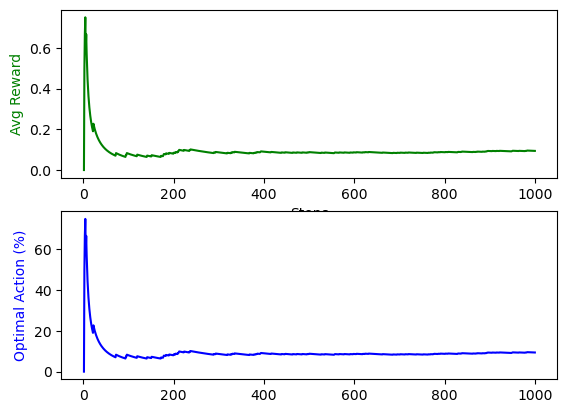

In [8]:
# all random
main(get_epsilon=lambda _: 1.0)

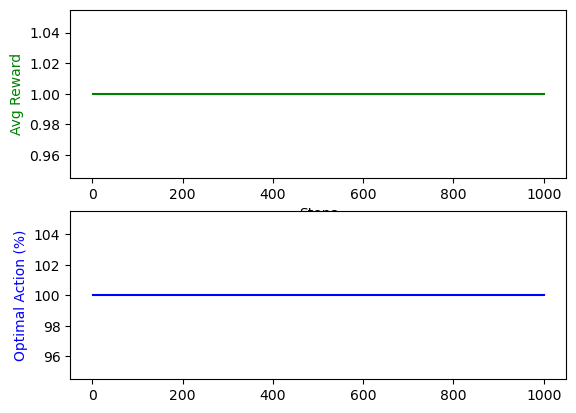

In [9]:
# greedy
main(get_epsilon=lambda _: 0.0)

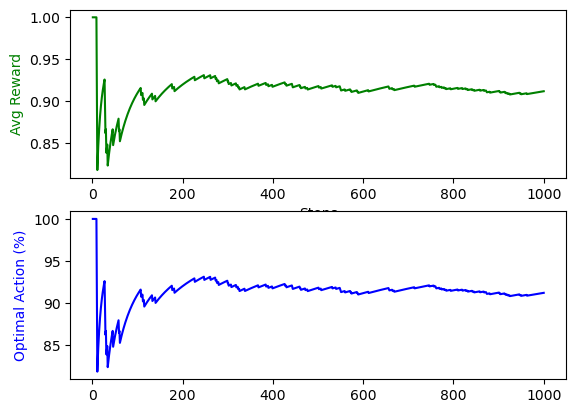

In [10]:
# only some random
main(get_epsilon=lambda _: 0.1)

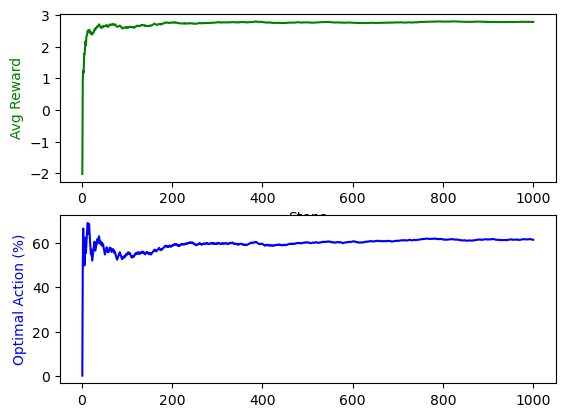

In [11]:
def get_distribution(deviation: float) -> float:
    return [np.random.normal(0, deviation) for _ in range(k)]

# almost stationary (fixed averages)
distributed_avgs = get_distribution(1)

def update_distribution(deviation: float) -> None:
    global distributed_avgs
    distributed_avgs = get_distribution(deviation)

def distributed_bandit(a: int, deviation=0.1) -> float:
    return distributed_avgs[a-1] + np.random.normal(0, 1)

main(bandit=distributed_bandit)

In [12]:
all = []
for i in range(100):
    rs = [distributed_bandit(i) for i in range(1, k+1)]
    all.append(rs)
    print(f'Step {i:3.0f}', [('' if r < 0 else ' ') + f'{r:.3f}' for r in rs])

Step   0 [' 0.659', ' 3.747', '-1.071', ' 0.960', ' 0.676', ' 0.185', ' 1.124', ' 1.270', ' 1.379', '-0.782']
Step   1 ['-0.316', ' 5.737', '-0.093', '-0.337', '-0.358', ' 0.265', '-0.428', ' 1.968', ' 1.378', '-0.817']
Step   2 [' 0.037', ' 3.205', ' 3.209', ' 0.467', ' 0.572', ' 2.000', ' 2.974', ' 1.338', ' 1.784', '-0.839']
Step   3 ['-1.230', ' 3.763', '-0.720', ' 1.836', '-0.733', ' 2.298', ' 0.484', ' 0.548', ' 2.753', '-0.855']
Step   4 ['-0.155', ' 2.709', '-0.928', ' 0.616', ' 0.483', ' 2.843', ' 0.522', '-0.536', ' 1.256', ' 0.705']
Step   5 ['-0.430', ' 3.680', ' 0.718', '-0.239', '-0.742', '-0.018', '-0.127', ' 0.206', ' 3.685', '-0.903']
Step   6 ['-0.793', ' 2.630', '-0.961', '-1.421', ' 0.971', ' 2.824', ' 0.861', ' 1.339', ' 3.243', ' 0.181']
Step   7 ['-0.685', ' 3.947', '-1.986', ' 1.341', '-1.203', '-0.563', ' 1.006', ' 1.807', ' 1.165', ' 0.438']
Step   8 ['-1.358', ' 2.070', ' 0.408', '-1.426', '-0.826', ' 1.385', ' 0.380', '-0.553', ' 1.409', '-0.969']
Step   9 [

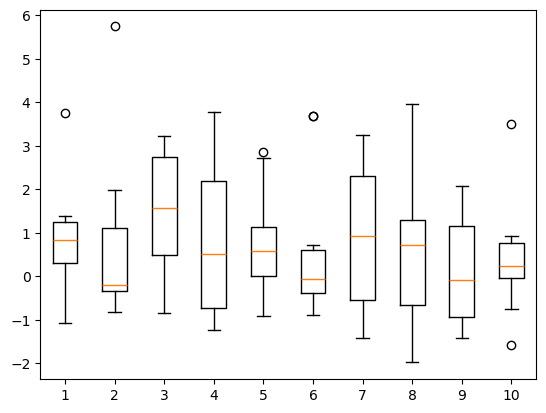

In [13]:
# plot the reward distribution
all = [all[:][i] for i in range(k)]
plt.boxplot(all)
plt.show()

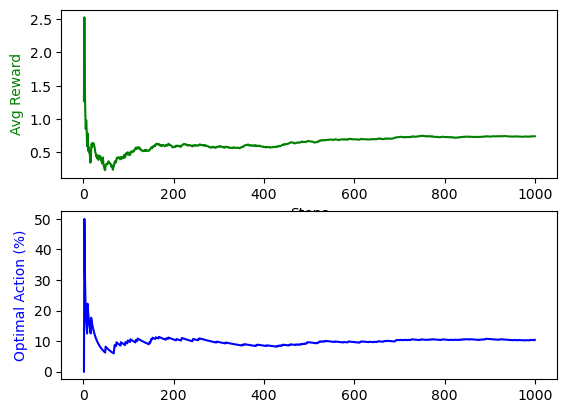

In [14]:
# all random
main(bandit=distributed_bandit, get_epsilon=lambda _: 1.0)

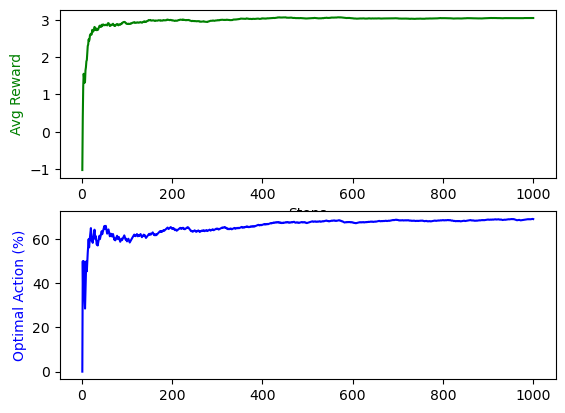

In [15]:
# greedy
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.0)

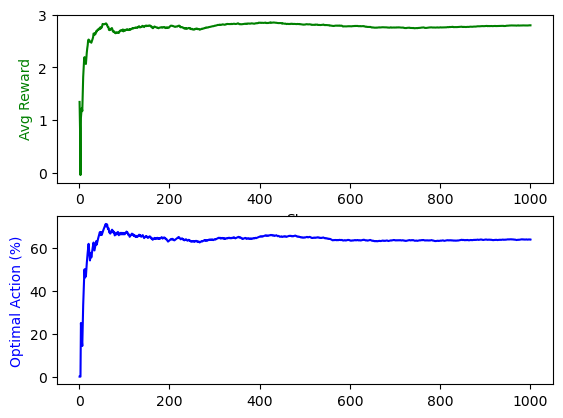

In [16]:
# only some random
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.1)

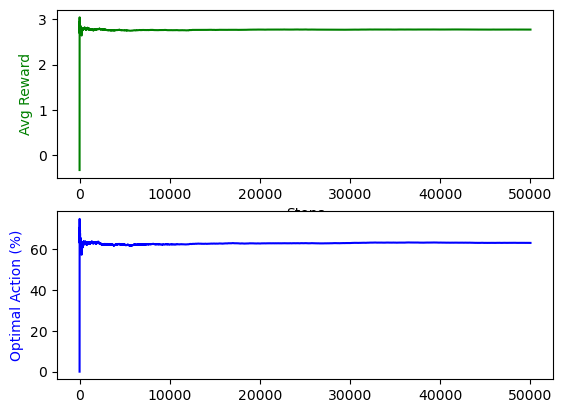

In [17]:
# only some random with more steps
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.1, steps=50000)

In [18]:
# higher distribution for better guesses
update_distribution(10)

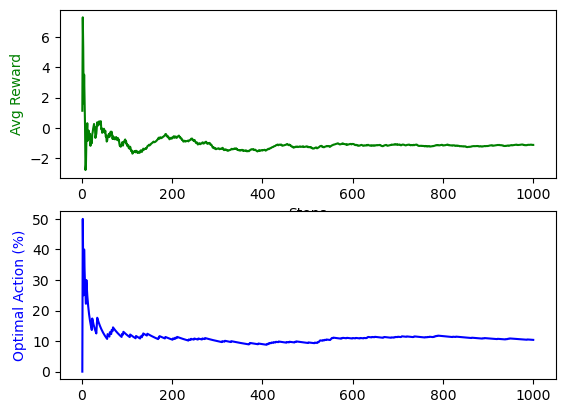

In [19]:
# all random
main(bandit=distributed_bandit, get_epsilon=lambda _: 1.0)

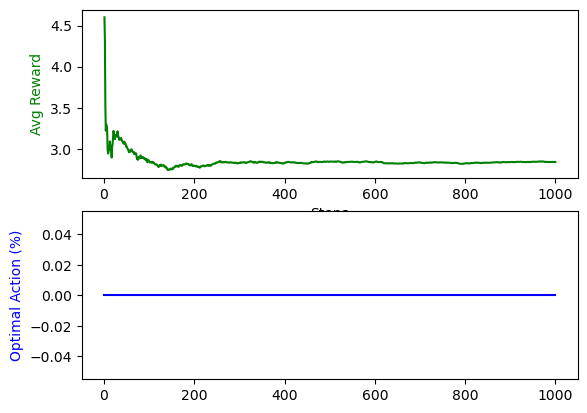

In [20]:
# greedy
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.0)

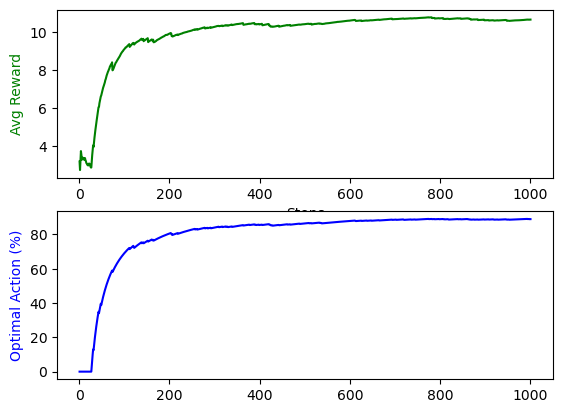

In [21]:
# only some random
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.1)

In [22]:
# smaller distribution to simulate non-stationary
update_distribution(0.01)

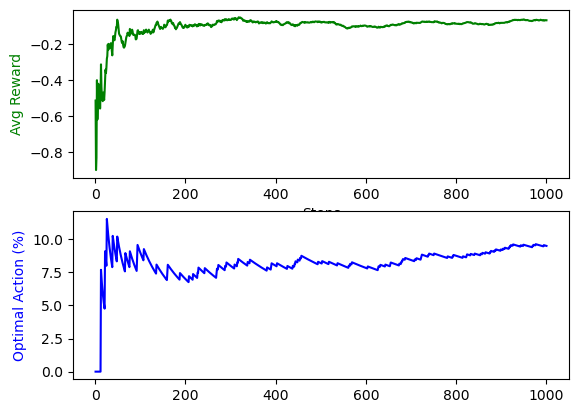

In [23]:
# all random
main(bandit=distributed_bandit, get_epsilon=lambda _: 1.0)

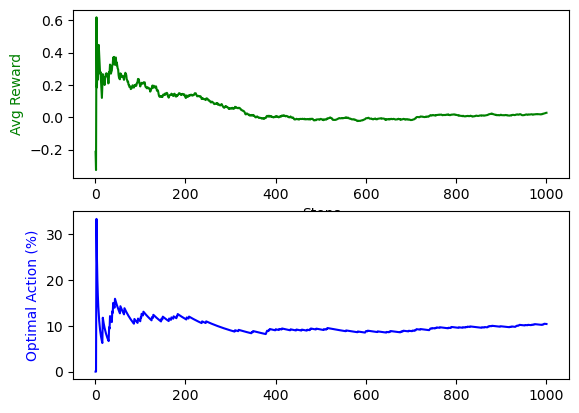

In [24]:
# greedy
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.0)

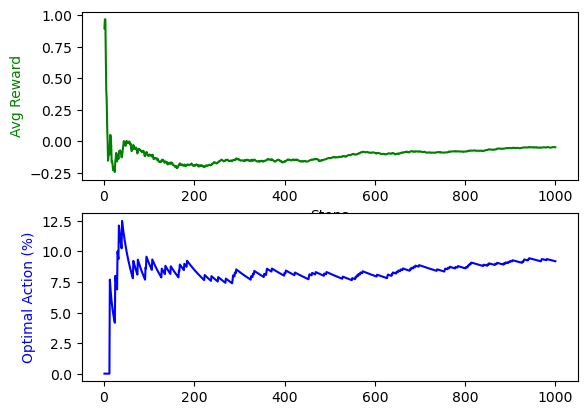

In [25]:
# only some random
main(bandit=distributed_bandit, get_epsilon=lambda _: 0.1)

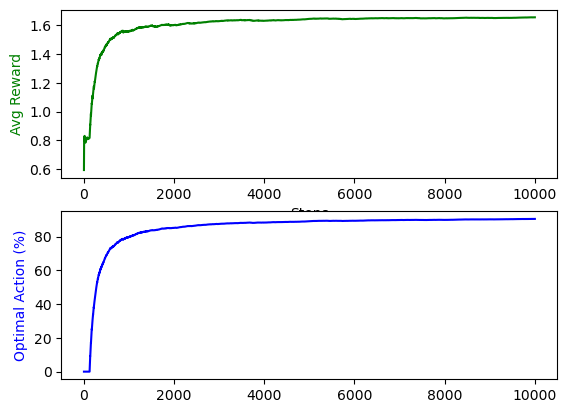

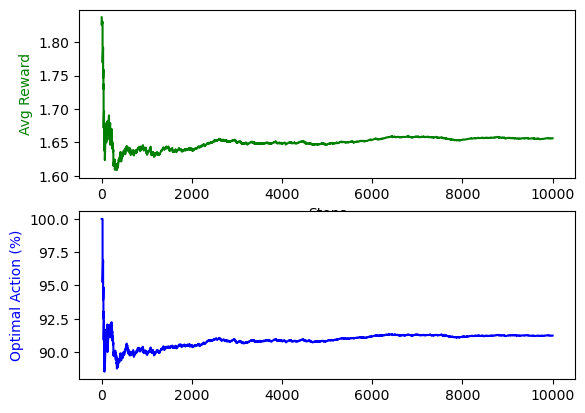

In [26]:
# Exercise 2.5 (pg. 55)

update_distribution(1)

def less_distributed_bandit(a: int) -> float:
    return distributed_avgs[a-1] + np.random.normal(0, 0.01)

# sample_averages
main(bandit=less_distributed_bandit, get_epsilon=lambda _: 0.1, steps=10000)

# constant_alpha
main(bandit=less_distributed_bandit, get_epsilon=lambda _: 0.1, steps=10000, get_alpha=lambda _, __: 0.1)